In [1]:
import warnings
warnings.filterwarnings('ignore') 

%load_ext autoreload
%autoreload 2

In [10]:
import gc
import pandas as pd
import numpy as np
import pickle

import anndata as ad
import scanpy as sc

import seaborn as sns
import matplotlib.gridspec as gridspec
from plotnine import *
import matplotlib.pyplot as plt

### Extended Figure 3b

In [4]:
df = pd.read_csv("./Extended_Figure3_data/rosmap_heldout_imputed_classification_perf.csv")

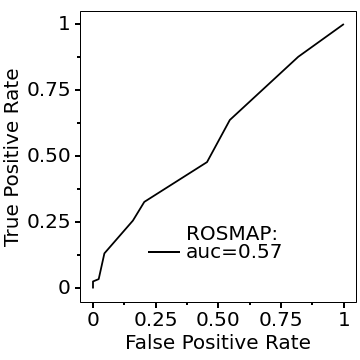

<Figure Size: (180 x 180)>

In [5]:
p_roc=(
    ggplot(df, aes(x='False Positive Rate', y='True Positive Rate',color='performance',))
    + geom_line(aes(linetype='performance'),size=0.5) # line plot
    + scale_color_manual(values=['black','grey'])
    + scale_linetype_manual(values=['solid','dashed'])
    + labs(x='False Positive Rate', y='True Positive Rate')

    +theme_minimal()
    + theme(
        panel_border=element_rect(colour = "black", size=0.5),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_background=element_blank(),
        plot_title=element_text(size=15,  
                                face="bold"),
        axis_ticks=element_line(colour = "black"),
        text=element_text(size=10),
        axis_text_x=element_text(colour="black", size=10, angle=0),
        axis_text_y=element_text(colour="black", size=10,),

        figure_size=(2.5, 2.5),
        legend_position=(0.6,0.3),
        legend_title=element_blank(),
        legend_direction="vertical",
        legend_background = element_blank(),
        legend_box_background = element_rect(colour = "black")
    )
)
p_roc
# p_roc.save('./Extended_Figure3_data/AUC_performance.png', dpi=300)

### Extended Figure 3c

<Axes: title={'center': 'louvain'}, xlabel='UMAP1', ylabel='UMAP2'>

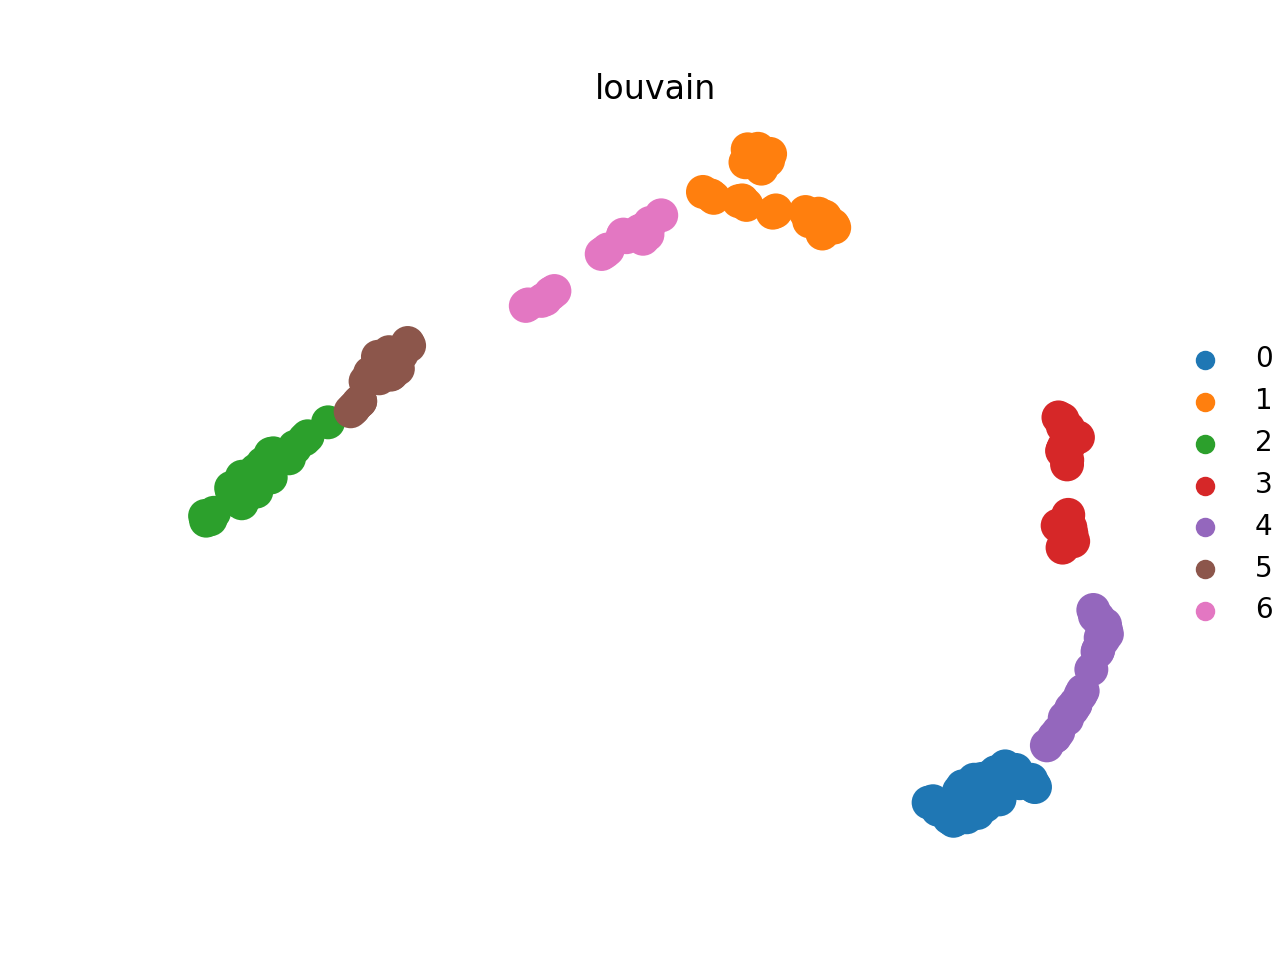

In [9]:
adata = ad.read_h5ad("./Extended_Figure3_data/rosmap_heldout_imputed_adata.h5ad")
sc.pl.umap(adata,color="louvain",show=False, frameon=False,)

### Extended Figure 3d

In [17]:
hyper_geom_log10_df = pd.read_csv("./Extended_Figure3_data/hypergeometric_enrichment.csv", index_col=0)

rows: 1, columns: 3


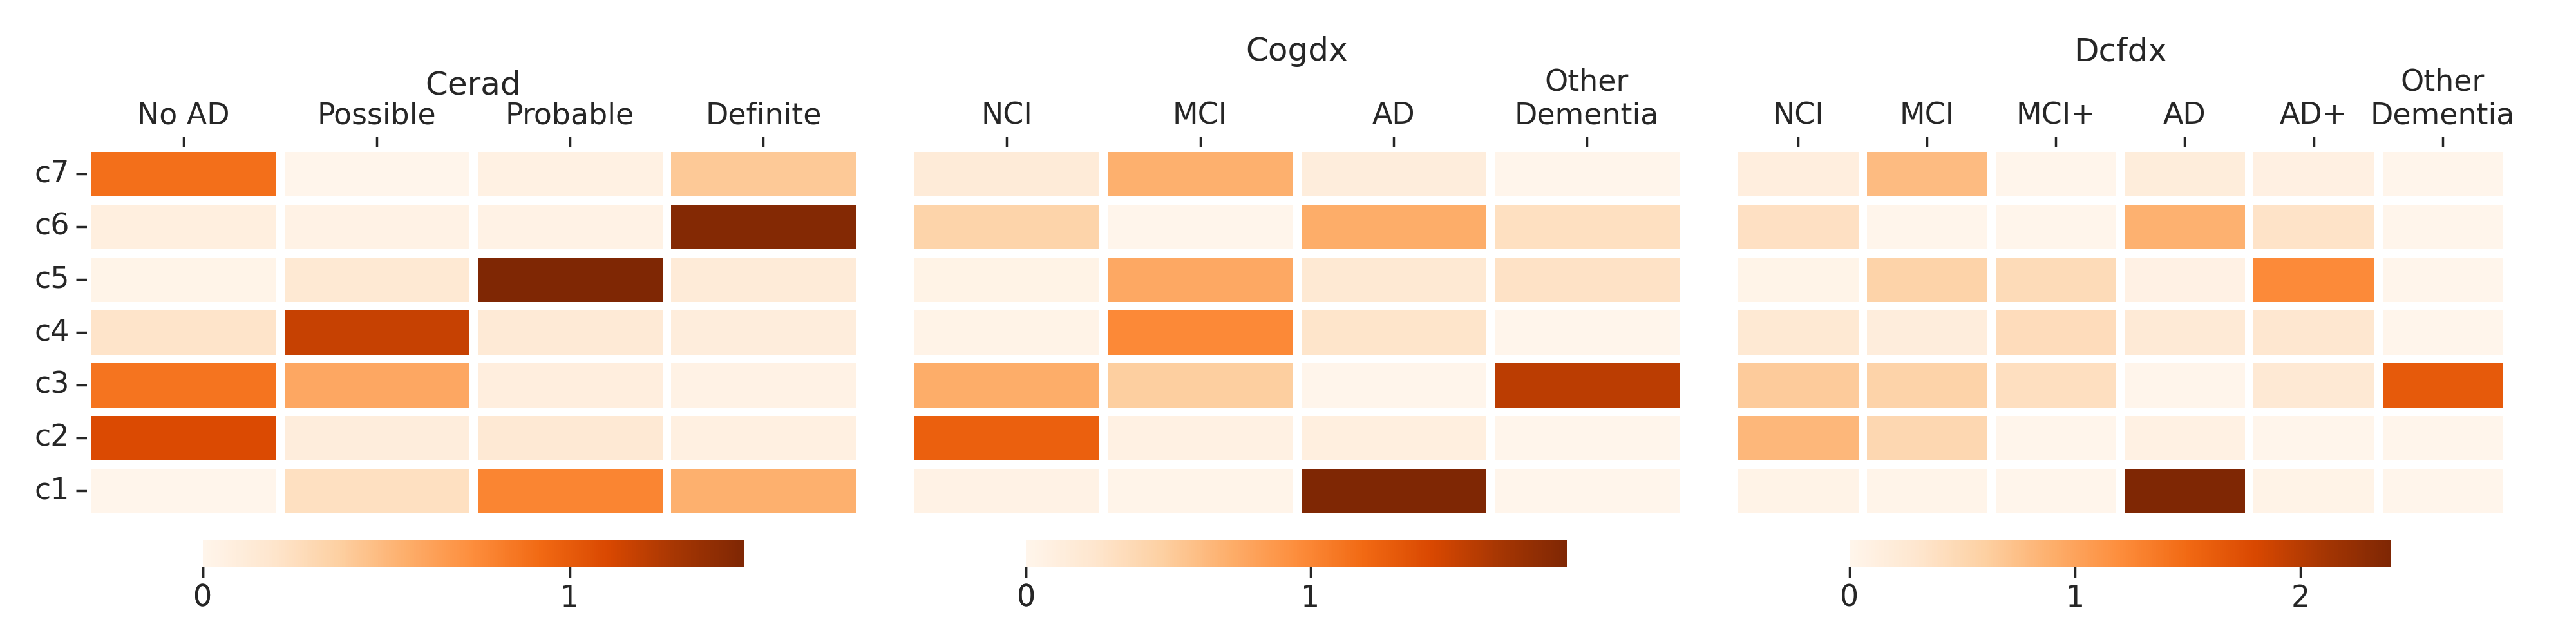

In [18]:
Tot = 10
Cols = 3
Rows = Tot // Cols 
if Tot % Cols != 0:
    Rows += 1
    
Rows = 1
print (f"rows: {Rows}, columns: {Cols}")

Position = range(1,Tot + 1)

i=0
fig = plt.figure(figsize=(20,5))
fig.subplots_adjust(left=1, bottom=0.1, right=1.6)
sns.set(font_scale=1.5)

for k,phen in enumerate([ 'Cerad','Cogdx', 'Dcfdx']):
    
    #print (phen)
    ax = fig.add_subplot(Rows,Cols,Position[k])
    label_class=hyper_geom_log10_df.columns[-1]
    temp=hyper_geom_log10_df[hyper_geom_log10_df[label_class]==phen][hyper_geom_log10_df.columns[:-1]]
    temp=temp.T
    temp=temp[::-1]
    mid=int(0.5*(np.abs(np.min(temp))+np.int32(np.max(temp))))

    if i==5:
        clrbar_label="-log10(p-value)"
    else: 
        clrbar_label=""
    sns.heatmap(temp, cmap="Oranges", linewidths=4, xticklabels=True, yticklabels=True, ax=ax, 
                vmin=np.abs(np.min(temp)),vmax=np.abs(np.max(temp)),
                square=False,
                cbar_kws={"orientation": "horizontal", "label": f"{clrbar_label}", "pad": 0.05,"shrink": 0.7})
    
    
    ax.set_xlabel(f"{phen}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.xaxis.tick_top()  # x axis on top
    ax.xaxis.set_label_position('top')
    ax.yaxis.set_label_position('left')
    
    if i==0:
        ax.tick_params(axis='y', rotation=0)
        ax.yaxis.tick_left()
    else:
        yax = ax.axes.get_yaxis()
        yax = yax.set_visible(False)
    i+=1
    
    cbar = ax.collections[0].colorbar
    cbar.set_ticks([np.abs(np.min(temp)), mid,np.int32(np.max(temp))])

plt.tight_layout()
# plt.savefig('./Extended_Figure3_data/HypergeomEnrichment.png', dpi=300)
plt.show()